In [ ]:
import numpy as np
from keras import utils, callbacks
from keras.models import Sequential
from keras.models import Model
import keras.applications
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split, StratifiedKFold
#from keras.preprocessing.image import load_img, img_to_array
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/tmp_R152_new/saved_model')
# Check its architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 2, 2, 2048)        58331648  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 35)                8995      
Total params: 60,438,051
Trainable params: 60,294,307
Non-trainable params: 143,744
_________________________________________________________________


In [ ]:
import tensorflow as tf

#export_dir = '/content/drive/MyDrive/saved_model_R152/saved_model'
#tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
with open('/content/drive/MyDrive/tmp_R152_new/model.tflite', 'wb') as f:
  f.write(tflite_model)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmp2mro_ll9/assets


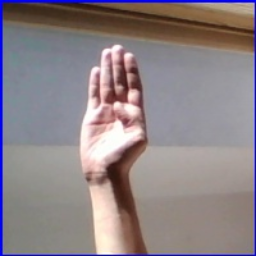

ValueError: ignored

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import glob
import random
from PIL import Image
from google.colab.patches import cv2_imshow
from skimage.transform import resize


# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/tmp_R152_new/model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
images_path = glob.glob(r"/content/drive/MyDrive/extra_testing/*.jpg")
# loop through all the images
for img_path in images_path:
    # Loading image
    pic = cv2.imread(img_path) 
    pic=cv2.resize(pic,(256,256))
    cv2_imshow(pic)
    key = cv2.waitKey(0)

    pic = pic.astype('float32') 
    pic = np.reshape(pic,(1,256,256,3))
    
    interpreter.set_tensor(input_details[0]['index'], pic)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print(output_data)            
'''
    try:
        cv2_imshow(pic)
        key = cv2.waitKey(0)
        interpreter.set_tensor(input_details[0]['index'], pic)
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])
        print(output_data)
    except:
        print('Error')'''

cv2.destroyAllWindows()
